In [1]:
import os
import cv2
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, BatchNormalization, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2, l1
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Input
from keras.models import Model
from emnist import list_datasets
from PIL import Image
from matplotlib import cm
import pickle 

In [14]:
#Build the model
model = Sequential()
model.add(Conv2D(50,(3,3), strides=1, padding = 'same', kernel_initializer = 'uniform', activation = 'relu', name = "seq1", input_shape = (28,28, 1)))
model.add(Dropout(0.0, name = "drop1"))
model.add(BatchNormalization(name = "batch1"))
model.add(Conv2D(100,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq2"))
model.add(Dropout(0.1, name = "drop2"))
model.add(Conv2D(100,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq3"))
model.add(Dropout(0.1, name = "drop3"))
model.add(BatchNormalization(name = "batch2"))
model.add(MaxPool2D((2, 2), strides=2, name = "max1"))
model.add(Conv2D(150,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq4"))
model.add(BatchNormalization(name = "batch3"))
model.add(Conv2D(200,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq5"))
model.add(Dropout(0.2, name = "drop4"))
model.add(Conv2D(200,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq6"))
model.add(Dropout(0.3, name = "drop5"))
model.add(BatchNormalization(name = "batch4"))
model.add(MaxPool2D((2, 2), strides=2, name = "max2"))
model.add(Conv2D(250,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq7"))
model.add(BatchNormalization(name = "batch5"))
model.add(Conv2D(300,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq8"))
model.add(Dropout(0.3, name = "drop6"))
model.add(Conv2D(300,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq9"))
model.add(Dropout(0.3, name = "drop7"))
model.add(BatchNormalization(name = "batch6"))
model.add(MaxPool2D((2, 2), strides=2))
model.add(Conv2D(350,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq10"))
model.add(Dropout(0.4, name = "drop8"))
model.add(BatchNormalization(name = "batch7"))
model.add(Conv2D(400,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq11"))
model.add(Dropout(0.4, name = "drop9"))
model.add(Conv2D(400,(3,3), strides=1, activation = 'relu', kernel_initializer = 'uniform', padding = 'same', name = "seq12"))
model.add(Dropout(0.4, name = "drop10"))
model.add(BatchNormalization(name = "batch8"))
model.add(MaxPool2D((2, 2), strides=2, name = "max3"))
model.add(Flatten(name = "flat"))
model.add(Dense(900, name = "dense1"))
model.add(Dense(200, name = "dense2"))
model.add(Dense(27, activation = 'softmax', name = "final"))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [16]:
# build the callback to get the best model
checkpoint_filepath = "./Desktop/saved_models/mybestmodel5.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_weights_only=False,
    mode='max',
    save_best_only=True)

In [2]:
#download the emnist dataset
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
# import the package that allows us to pick which sample to import
from emnist import extract_training_samples

In [4]:
# pick to import emnist letters 
images, labels = extract_training_samples('letters')

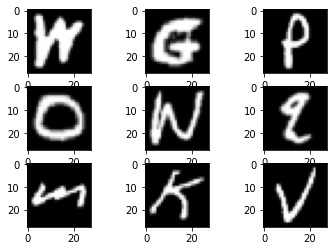

In [5]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [20]:
#print the shape of images and labels
print (images.shape)
print (labels.shape)

(124800, 28, 28)
(124800,)


In [21]:
# divide the images into training and testing
x_train=images[:100000]
lab = labels[:100000]
print (x_train.shape)
x_test = images[100001:120000]
y_test = labels[100001:120000]

(100000, 28, 28)


In [43]:
# create a function that normalize images
def normalize_data (data):
  " it takes a dataset and return the data normalized"
  data_norm = data.astype('float32')
  data_norm = data_norm / 255.0
  return data_norm

In [44]:
# normalize my training data
x_train = x_train.reshape(-1, 28, 28, 1)
train_images_normalize = normalize_data(x_train)

In [46]:
# slipt data into train and validation sets
#x_train,x_val,y_train,y_val=train_test_split(train_images_normalize,lab,test_size=.3)

In [26]:
#One hot encode the labels
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [27]:
# Train the model
#history = model.fit(x_train,y_train, epochs=50,
                    #validation_data=((x_val,y_val)), callbacks=[model_checkpoint_callback])

In [28]:
#download my model that I saved after training
mymodel = tf.keras.models.load_model('./Desktop/saved_models/mybestmodel5.hdf5')

In [29]:
mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
# print the shape and number of images in our test set
print (x_test.shape)

(19999, 28, 28, 1)


In [67]:
# evaluate model on the 19999 emnist sample images that were left out for testing
x_test = x_test.reshape(-1, 28, 28, 1)
test_images_normalize = normalize_data(x_test)
history = mymodel.evaluate(test_images_normalize, y_test, batch_size=32)

(19999, 28, 28, 1)
625/625 [==============================] - 154s 246ms/step - loss: 0.1778 - accuracy: 0.9523
